## Single variable regression


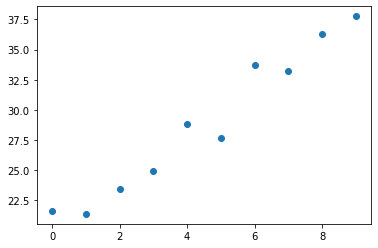

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

np.random.seed(1)
X = np.arange(0,10)
Y = 20 + 2*X + np.random.randn(10)

plt.scatter(X, Y);

You can visually confirm that there is a linear trend here, so what's the best line that can fit?

In [26]:
lr = LinearRegression().fit(X.reshape(-1, 1), Y)
print("Y =", lr.coef_[0], 'X +', lr.predict([[0]])[0])

Y = 1.9622627030632673 X + 20.0726769454092


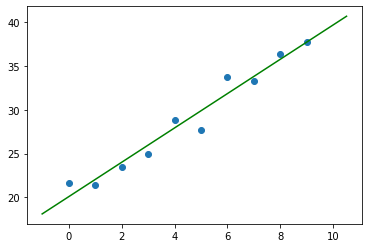

In [27]:
plt.scatter(X, Y);

# Testing with some new points
Xnew = np.arange(-1, 11, 0.5).reshape(-1, 1)
Ynew = lr.predict(Xnew)
plt.plot(Xnew, Ynew, color='g')

## Going to higher dimensions - Bike sharing

This dataset is available on [kaggle](https://www.kaggle.com/lakshmi25npathi/bike-sharing-dataset)

In [ ]:
!mkdir data
!wget -O data/bikes.csv https://raw.githubusercontent.com/MJafarMashhadi/MachineLearningWorkshop/master/data/bikes.csv

In [30]:
df = pd.read_csv('data/bikes.csv')
features, target = df.drop(['cnt'], axis=1), df['cnt']

df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600
5,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,1606
6,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,1510
7,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,959
8,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,822
9,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,1321


In [54]:
for col_name in ('season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'):
    df[col_name] = df[col_name].astype('category')

df.describe().drop(['count'])

,temp,atemp,hum,windspeed,cnt
mean,0.495385,0.474354,0.627894,0.190486,4504.348837
std,0.183051,0.162961,0.142429,0.077498,1937.211452
min,0.059130,0.079070,0.000000,0.022392,22.000000
25%,0.337083,0.337842,0.520000,0.134950,3152.000000
50%,0.498333,0.486733,0.626667,0.180975,4548.000000
75%,0.655417,0.608602,0.730209,0.233214,5956.000000
max,0.861667,0.840896,0.972500,0.507463,8714.000000


### Splitting the data and training a regression model

In [55]:
scores = {'Training': [], 'Test': []}
for random_state in np.arange(10, 20):
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=random_state)
    lr = LinearRegression().fit(X_train, y_train)

    scores['Training'].append(100 * lr.score(X_train, y_train))
    scores['Test'].append(100 * lr.score(X_test, y_test))

scores = pd.DataFrame(scores)
scores.describe().drop(['count'])

,Training,Test
mean,80.040782,78.899809
std,1.205752,3.465150
min,78.490772,72.950858
25%,79.065945,76.403261
50%,79.795790,79.495478
75%,80.984948,81.763490
max,82.015489,83.168524
